In [1]:
%load_ext zipline

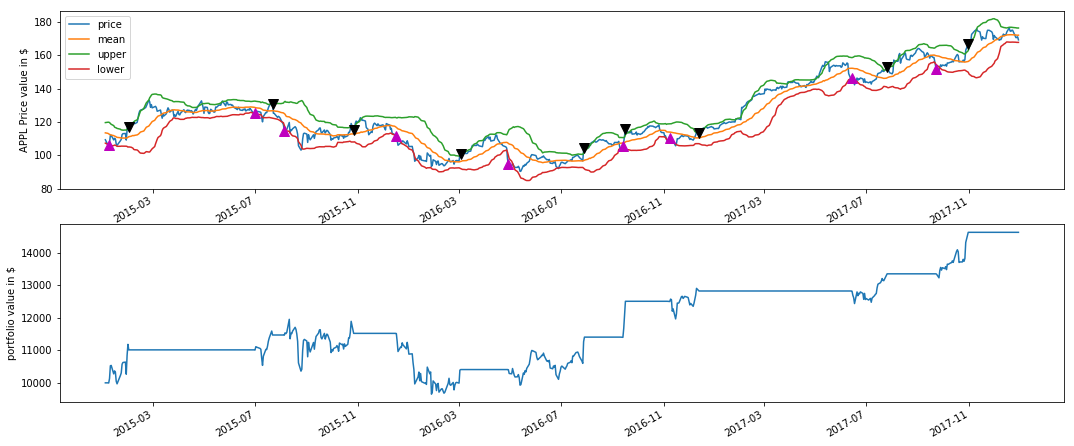

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,upper
2015-01-02 21:00:00+00:00,NaN,0.000000,NaN,-0.000535,NaN,NaN,0.00000,10000.000000,0.00,0.00,...,0.0,0,NaN,10000.000000,0.00,0.00,1,[],0.0,119.622394
2015-01-05 21:00:00+00:00,0.000000,0.000000,0.000000,-0.018585,0.196720,0.000000,0.00000,10000.000000,0.00,0.00,...,0.0,0,NaN,10000.000000,0.00,0.00,2,[],0.0,119.843788
2015-01-06 21:00:00+00:00,0.004663,-0.000509,-0.042110,-0.027829,0.139106,0.000268,-9993.52822,6.471780,9988.44,9988.44,...,0.0,0,-9.165151,10000.000000,0.00,0.00,3,"[{u'commission': None, u'amount': 94, u'sid': ...",0.0,119.848794
2015-01-07 21:00:00+00:00,0.112636,0.013497,1.296355,-0.015715,0.206973,0.454765,0.00000,6.471780,10128.50,10128.50,...,0.0,0,210.657407,6.471780,9988.44,9988.44,4,[],0.0,119.656258
2015-01-08 21:00:00+00:00,0.267080,0.052413,2.511148,0.001752,0.236042,0.947591,0.00000,6.471780,10517.66,10517.66,...,0.0,0,724.158904,6.471780,10128.50,10128.50,5,[],0.0,119.066772
2015-01-09 21:00:00+00:00,0.246383,0.053541,2.458939,-0.006276,0.218112,0.957288,0.00000,6.471780,10528.94,10528.94,...,0.0,0,674.715149,6.471780,10517.66,10517.66,6,[],0.0,118.590400
2015-01-12 21:00:00+00:00,0.301461,0.027597,1.570097,-0.014060,0.203322,1.117973,0.00000,6.471780,10269.50,10269.50,...,0.0,0,6.905592,6.471780,10528.94,10528.94,7,[],0.0,117.818245
2015-01-13 21:00:00+00:00,0.280408,0.036715,1.750091,-0.016834,0.188302,1.113541,0.00000,6.471780,10360.68,10360.68,...,0.0,0,8.481463,6.471780,10269.50,10269.50,8,[],0.0,116.937717
2015-01-14 21:00:00+00:00,0.266091,0.032767,1.646228,-0.022769,0.177394,1.127810,0.00000,6.471780,10321.20,10321.20,...,0.0,0,7.093988,6.471780,10360.68,10360.68,9,[],0.0,116.631829
2015-01-15 21:00:00+00:00,0.294786,0.004755,1.165858,-0.031722,0.170558,1.262388,0.00000,6.471780,10041.08,10041.08,...,0.0,0,0.857212,6.471780,10321.20,10321.20,10,[],0.0,116.469793


In [16]:
%%zipline --start 2015-1-1 --end 2018-1-1 --capital-base 10000 -o ../data/strategy6.pickle

import matplotlib.pyplot as plt
import talib
from talib import BBANDS
from zipline.api import (
    sid, 
    symbol,
    schedule_function, 
    date_rules, 
    time_rules,
    order_target_percent,
    record)

def initialize(context):
    context.asset = symbol('AAPL')
    schedule_function(rebalance, date_rules.every_day(), time_rules.market_open())
    context.LOW_RSI = 30
    context.HIGH_RSI = 70
    
    
# Rebalance daily.
def rebalance(context, data):
    current_position = context.portfolio.positions[context.asset].amount
    price=data.current(context.asset, 'price')
    days = 30
    # Load historical data for the stocks
    prices = data.history(context.asset, 
                          fields='price', 
                          bar_count=days, 
                          frequency='1d')
    
    upper, middle, lower = talib.BBANDS(
        prices, 
        timeperiod=30,
        # number of non-biased standard deviations from the mean
        nbdevup=2,
        nbdevdn=2,
        # Moving average type: simple moving average here
        matype=0)
    
    # If price is below the recent lower band and we have
    # no long positions then invest the entire
    # portfolio value into SPY
    if price <= lower[-1] and current_position <= 0 and data.can_trade(context.asset):
        order_target_percent(context.asset, 1.0)
    
    # If price is above the recent upper band and we have
    # no short positions then invest the entire
    # portfolio value to short Asset
    elif price >= upper[-1] and current_position > 0 and data.can_trade(context.asset):
        order_target_percent(context.asset, 0)
        
    record(upper=upper[-1],
           lower=lower[-1],
           mean=middle[-1],
           price=price,
           position_size=current_position)
    
    
def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf[['price', 'mean','upper','lower']].plot(ax=ax1)
    
    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[
        [t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax1.plot(buys.index, perf['price'].ix[buys.index],
             '^', markersize=10, color='m')
    ax1.plot(sells.index, perf['price'].ix[sells.index],
             'v', markersize=10, color='k')
    
    ax1.set_ylabel('APPL Price value in $')
        
    ax2 = fig.add_subplot(212)
    perf.portfolio_value.plot(ax=ax2)
    ax2.set_ylabel('portfolio value in $')
    plt.gcf().set_size_inches(18, 8)
    plt.show()

In [17]:
import pandas as pd
perf = pd.read_pickle('../data/strategy6.pickle')
perf.columns
perf[['benchmark_period_return','algorithm_period_return']]

,benchmark_period_return,algorithm_period_return
2015-01-02 21:00:00+00:00,-0.000535,0.000000
2015-01-05 21:00:00+00:00,-0.018585,0.000000
2015-01-06 21:00:00+00:00,-0.027829,-0.000509
2015-01-07 21:00:00+00:00,-0.015715,0.013497
2015-01-08 21:00:00+00:00,0.001752,0.052413
2015-01-09 21:00:00+00:00,-0.006276,0.053541
2015-01-12 21:00:00+00:00,-0.014060,0.027597
2015-01-13 21:00:00+00:00,-0.016834,0.036715
2015-01-14 21:00:00+00:00,-0.022769,0.032767
2015-01-15 21:00:00+00:00,-0.031722,0.004755
